In [1]:
from datetime import timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import orbit
from orbit.models import DLT,ETS, KTRLite, LGT, ARMA
from orbit.utils.simulation import make_trend, make_regression



In [2]:
from datetime import datetime, timedelta



In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta
        
hours = [datetime(2013, 1, 1, 14, 00)]        

start_date = datetime(2021, 1, 1, 00, 00)
end_date = datetime(2022, 1, 1, 00, 00)
i = 0
for single_date in daterange(start_date, end_date):
    hours[i]=hours.append(single_date.strftime("%Y-%m-%d %H:%M"))       
    i += i
hours = hours[1:8737]    

<class 'numpy.ndarray'>


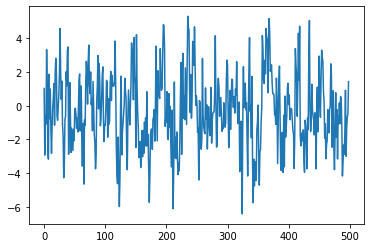

In [5]:
# make the data
n = 8736 # hourly for 1 year 

x0 = np.random.normal(0, 1, n)
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)
x4 = np.random.normal(0, 1, n)
x5 = np.random.normal(0, 1, n)
x6 = np.random.normal(0, 1, n)
x7 = np.random.normal(0, 1, n)
x8 = np.random.normal(0, 1, n)
x9 = np.random.normal(0, 1, n)

X = np.vstack([x0, x1]).transpose()
   
    

eta = np.random.normal(0, 1, n)
rho = [0.45, -0.25, 0.25]
beta = [1.00, -1.00]
y = eta.copy()
for i in range(2, n):
    y[i] = rho[0]*y[i-1] + rho[1]*y[i-24] + rho[2]*y[i-168] + x0[i]*beta[0]+ x1[i]*beta[1]+ eta[i]

    
    
#plt.plot(y)
plt.plot(y[1:500])
print(type(X))

In [6]:
df = pd.DataFrame(X, columns=['a1', 'a2'])
df['hours'] = hours
df['y'] = y

In [101]:
mod = ARMA(
        regressor_col=['a1', 'a2'],
        lm_first=True,
        estimator='stan-mcmc',
        date_col = 'hours',
        response_col = 'y',
        num_of_ar_lags = 3,
        ar_lags = [1,24,168],
        num_of_ma_lags = 1,
        ma_lags = [1] ,

)

In [102]:
mod.fit(df)


Gradient evaluation took 0.010374 seconds
1000 transitions using 10 leapfrog steps per transition would take 103.74 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.012347 seconds
1000 transitions using 10 leapfrog steps per transition would take 123.47 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.011581 seconds
1000 transitions using 10 leapfrog steps per transition would take 115.81 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.012425 seconds
1000 transitions using 10 leapfrog steps per transition would take 124.25 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:   1 / 250 [  0%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  25 / 250 [ 10%]  (Warmup)
Iteration:  50 / 250 [ 20%]  (Wa

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [99]:
A = mod.get_posterior_samples()

In [100]:
A.keys()

odict_keys(['obs_sigma', 'mu', 'rho', 'theta'])

In [68]:
len([])

0